#  Détection de phonèmes par analyse du signal vocal

L'objectif de ce TP consiste à détecter et reconnaître les phonèmes  à partir de fichiers sonores au format *.wav* via l'analyse cepstrale.



Vous disposez d'une base d'apprentissage et une base de test. Il faut reconnaître tous les phénomènes suivants :
$$'a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u'$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn as sk
import math

Les lignes de code suivantes permettent de transformer le fichier audio en matrice de paramètres appélés MFCC (Mel Frequency Cepstral Coefficient) en utilisant la librairie python *librosa*. Ces paramètres permettent d'extraire au mieux le contenu vocal fréquenciel du signal audio.

Comme chaque fichier a une durée différente, on calcule la moyenne des MFCC sur toutes les fenêtres de discrétisation. 

La matrice de sortie est composée d'autant de vecteurs lignes que de fichiers audio. Le nombre de colonnes correspond à la dimension du vecteur moyen représentatif des MFCC : ici 13.

In [2]:
import librosa

In [3]:
from os import listdir
from os.path import isfile, join
fichiers = [f for f in listdir("./Data/")]
sort_fichiers = sorted(fichiers)
DataMFCC=[]
label=[]
#print(sort_fichiers)

# Calcul des MFCC sur tous les fichiers de la base de données
for i in range(len(sort_fichiers)):
    # chargement du fichier audio
    y, sr = librosa.load("./Data/" + sort_fichiers[i])
    mfccBA = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True, n_mfcc=13)
    # Stockage et calcul du MFCC moyen pour le phonème
    DataMFCC.append(np.mean(mfccBA,axis=1))
    # Stockage de l'étiquette label
    label.append(i//10)

DataMFCC=np.asarray(DataMFCC)
label=np.asarray(label)
print(DataMFCC.shape)

(90, 13)


In [76]:
# Phonème associé à chaque valeur de label
Liste_label=['a','e','e\_aigu','e\_grave','i','o','o\_ouvert','ou','u'] 
Liste_label2=['a','e','é','è','i','o','ò','ou','u']

In [7]:
# Séparation de l'ensemble de données en Base d'apprentissage et base de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DataMFCC, label, random_state=0,test_size=0.2)

print('Dimension Base d apprentissage :', X_train.shape)
print('Dimension Base de test :', X_test.shape)

Dimension Base d apprentissage : (72, 13)
Dimension Base de test : (18, 13)


# Partie I : Classification des phonèmes sans prétraitement 

Réaliser une classification de ces phonèmes par une méthode d'apprentissage supervisé et une méthode d'apprentissage non supervisé de votre choix en utilisant soit les codes des TP précédents, soit en utilisant la librairie *scikit-learn*.

Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser le triangle voyellique présenté ci-après pour interpréter les résultats.

## Méthode supervisée  : 
indiquer quelle est la méthode superviée de votre choix et calculer la matrice de confusion associée. 

In [8]:
from sklearn.tree import DecisionTreeClassifier as DTC
treeCl = DTC()
treeCl = treeCl.fit(X_train, y_train)
y_pred_super = treeCl.predict(X_test)
print(treeCl.classes_)

[0 1 2 3 4 5 6 7 8]


positif = 83.333333%


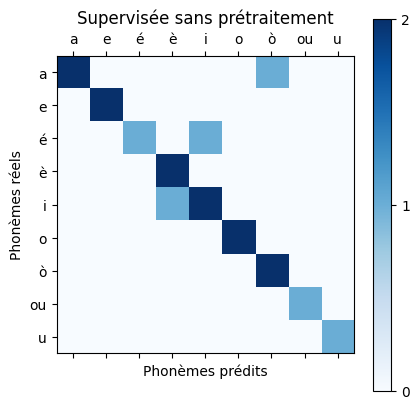

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn import cluster as cl

# Calcul de la matrice de confusion
conf = confusion_matrix(y_test, y_pred_super)
print("positif = %f%%" %((np.trace(conf)/18)*100))

plt.matshow(conf, cmap='Blues', interpolation='none')
plt.title('Supervisée sans prétraitement')
plt.colorbar(ticks=range(0, np.max(conf) + 1, 1))
plt.ylabel('Phonèmes réels')
plt.xlabel('Phonèmes prédits')
plt.xticks(range(len(Liste_label2)), Liste_label2)
plt.yticks(range(len(Liste_label2)), Liste_label2)
plt.show()


## Méthode non supervisée
`
indiquer quelle est la méthode non supervisée de votre choix et calculer la matrice de confusion associée. 

In [94]:
#Classification specatrale
clsp = cl.KMeans(n_clusters=9, random_state=0).fit(X_train)
y_pred_non_super = clsp.fit_predict(X_test)



/home/bilel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bilel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


positif = 27.777778%


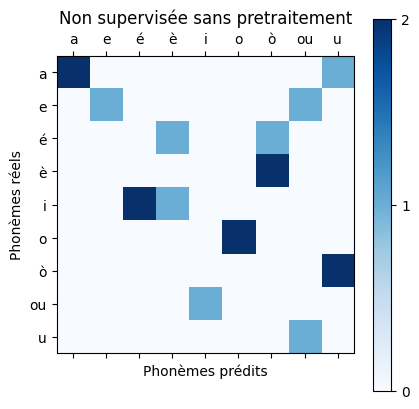

In [102]:
# Calcul de la matrice de confusion
conf = confusion_matrix(y_test, y_pred_non_super)
print("positif = %f%%" %((np.trace(conf)/18)*100))

plt.matshow(conf, cmap='Blues', interpolation='none')
plt.title('Non supervisée sans pretraitement')
plt.colorbar(ticks=range(0, np.max(conf) + 1, 1))
plt.ylabel('Phonèmes réels')
plt.xlabel('Phonèmes prédits')
plt.xticks(range(len(Liste_label2)), Liste_label2)
plt.yticks(range(len(Liste_label2)), Liste_label2)
plt.show()


# Partie II : classification des phonèmes avec prétraitement 


## Méthode supervisée


In [105]:
from sklearn.decomposition import PCA

pca_sup = PCA(n_components=0.7)
transform_data_super = pca_sup.fit_transform(X_train)
transform_data_test_super = pca_sup.transform(X_test)
treeCl_pca = DTC()
treeCl_pca = treeCl_pca.fit(transform_data_super, y_train)
y_pred_super_pca = treeCl_pca.predict(transform_data_test_super)
print(treeCl.classes_)



[0 1 2 3 4 5 6 7 8]


positif = 83.333333%


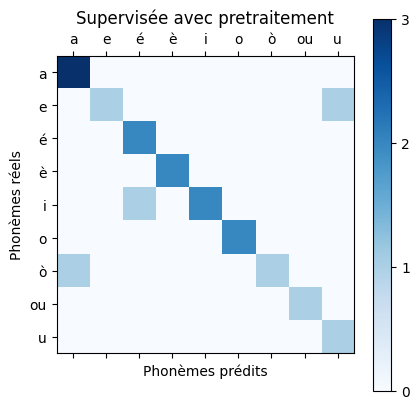

In [107]:
# Calcul de la matrice de confusion
conf = confusion_matrix(y_test, y_pred_super_pca)
print("positif = %f%%" %((np.trace(conf)/18)*100))

plt.matshow(conf, cmap='Blues', interpolation='none')
plt.title('Supervisée avec pretraitement')
plt.colorbar(ticks=range(0, np.max(conf) + 1, 1))
plt.ylabel('Phonèmes réels')
plt.xlabel('Phonèmes prédits')
plt.xticks(range(len(Liste_label2)), Liste_label2)
plt.yticks(range(len(Liste_label2)), Liste_label2)
plt.show()


## Méthode non supervisée

In [108]:
pca_non_sup = PCA(n_components=0.85)
transform_data_non_super = pca_non_sup.fit_transform(X_train)
transform_data_test_non_super = pca_non_sup.transform(X_test)

clsp_pca = cl.KMeans(n_clusters=9, random_state=0).fit(transform_data_non_super, y_train)
y_pred_non_super = clsp_pca.fit_predict(transform_data_test_non_super)

/home/bilel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/bilel/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


positif = 38.888889%


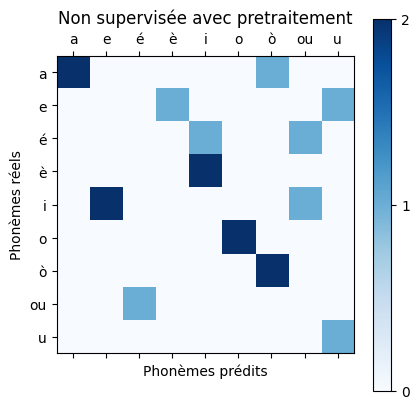

In [109]:
# Calcul de la matrice de confusion
conf = confusion_matrix(y_test, y_pred_non_super)
print("positif = %f%%" %((np.trace(conf)/18)*100))

plt.matshow(conf, cmap='Blues', interpolation='none')
plt.title('Non supervisée avec pretraitement')
plt.colorbar(ticks=range(0, np.max(conf) + 1, 1))
plt.ylabel('Phonèmes réels')
plt.xlabel('Phonèmes prédits')
plt.xticks(range(len(Liste_label2)), Liste_label2)
plt.yticks(range(len(Liste_label2)), Liste_label2)
plt.show()


## Partie III : Analyse des résultats 

Pour chaque résultat obtenu, calculer la matrice de confusion et utiliser le triangle voyellique présenté ci-après pour interpréter les résultats.

<img src="./triangle_voyellique.jpg" width="600" height="600"  >

### Sans prétraitrement:

#### Méthode supervisé:
Pour la méthode superviśe nous avons utilsé celle des arbres de décision. Nous obtenons des résultats efficaces de l'ordre 85%.

#### Méthode non supervisé: